In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Cleaning

In [2]:
df = pd.read_csv('loan_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [4]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [5]:
df['person_age'] = pd.to_numeric(df['person_age'], errors='coerce')
df['person_income'] = pd.to_numeric(df['person_income'], errors='coerce')
df['person_emp_exp'] = pd.to_numeric(df['person_emp_exp'], errors='coerce')
df['loan_amnt'] = pd.to_numeric(df['loan_amnt'], errors='coerce')
df['loan_int_rate'] = pd.to_numeric(df['loan_int_rate'], errors='coerce')
df['loan_percent_income'] = pd.to_numeric(df['loan_percent_income'], errors='coerce')
df['cb_person_cred_hist_length'] = pd.to_numeric(df['cb_person_cred_hist_length'], errors='coerce')
df['credit_score'] = pd.to_numeric(df['credit_score'], errors='coerce')

In [6]:
df.fillna(df.median(numeric_only=True), inplace=True)
df.dropna(subset=['loan_status'], inplace=True)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
numeric_cols = df.select_dtypes(include=[np.number])
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

outlier_mask = (numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))
df = df[~outlier_mask.any(axis=1)]

In [9]:
df['person_gender'] = df['person_gender'].str.lower().str.strip()
df['person_education'] = df['person_education'].str.lower().str.strip()
df['person_home_ownership'] = df['person_home_ownership'].str.lower().str.strip()
df['loan_intent'] = df['loan_intent'].str.lower().str.strip()

# Univariate Analysis

In [10]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,29562.000000,29562.000000,29562.000000,29562.000000,29562.000000,29562.000000,29562.000000,29562.000000,29562.0
mean,26.667546,74128.443576,4.328631,8244.340065,10.406618,0.120000,5.197619,632.719336,0.0
std,4.112770,31368.746526,4.149837,4716.321676,2.709543,0.065577,2.905009,47.670305,0.0
min,20.000000,9595.000000,0.000000,500.000000,5.420000,0.010000,2.000000,498.000000,0.0
25%,23.000000,49949.000000,1.000000,4881.250000,7.900000,0.070000,3.000000,602.000000,0.0
50%,26.000000,68343.500000,3.000000,7200.000000,10.750000,0.110000,4.000000,639.000000,0.0
75%,29.000000,92164.500000,7.000000,11000.000000,12.220000,0.160000,7.000000,668.000000,0.0
max,39.000000,168633.000000,18.000000,23000.000000,19.470000,0.370000,15.000000,762.000000,0.0


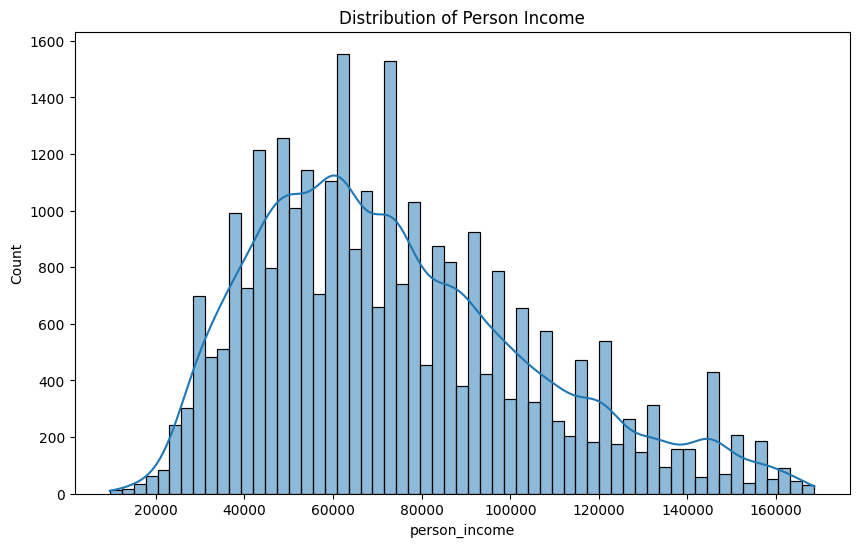

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['person_income'], kde=True)
plt.title('Distribution of Person Income')
plt.show()

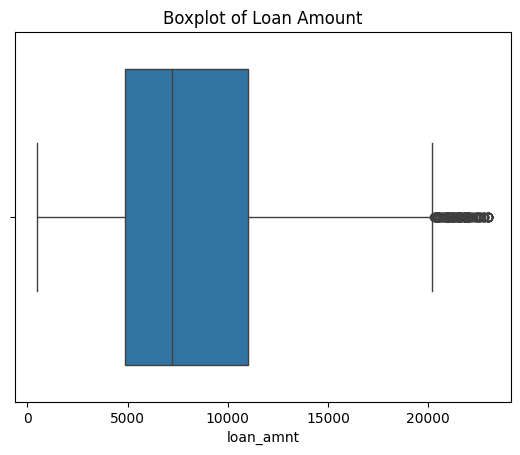

In [12]:
sns.boxplot(x=df['loan_amnt'])
plt.title('Boxplot of Loan Amount')
plt.show()

# Bivariate Analysis

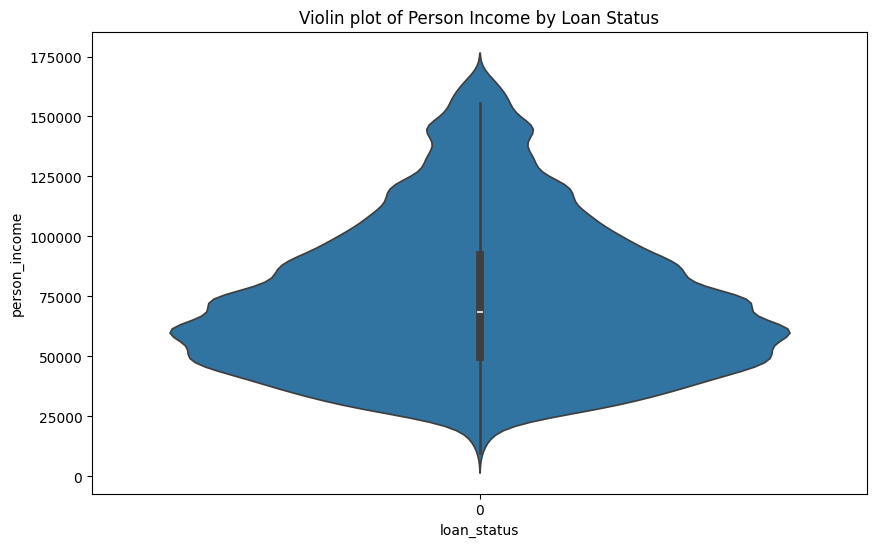

In [15]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='loan_status', y='person_income', data=df)
plt.title('Violin plot of Person Income by Loan Status')
plt.show()

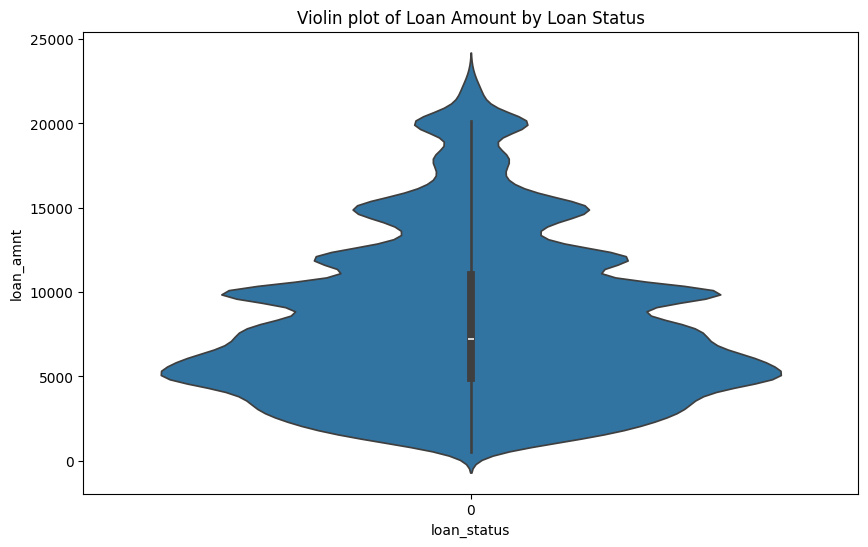

In [16]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='loan_status', y='loan_amnt', data=df)
plt.title('Violin plot of Loan Amount by Loan Status')
plt.show()

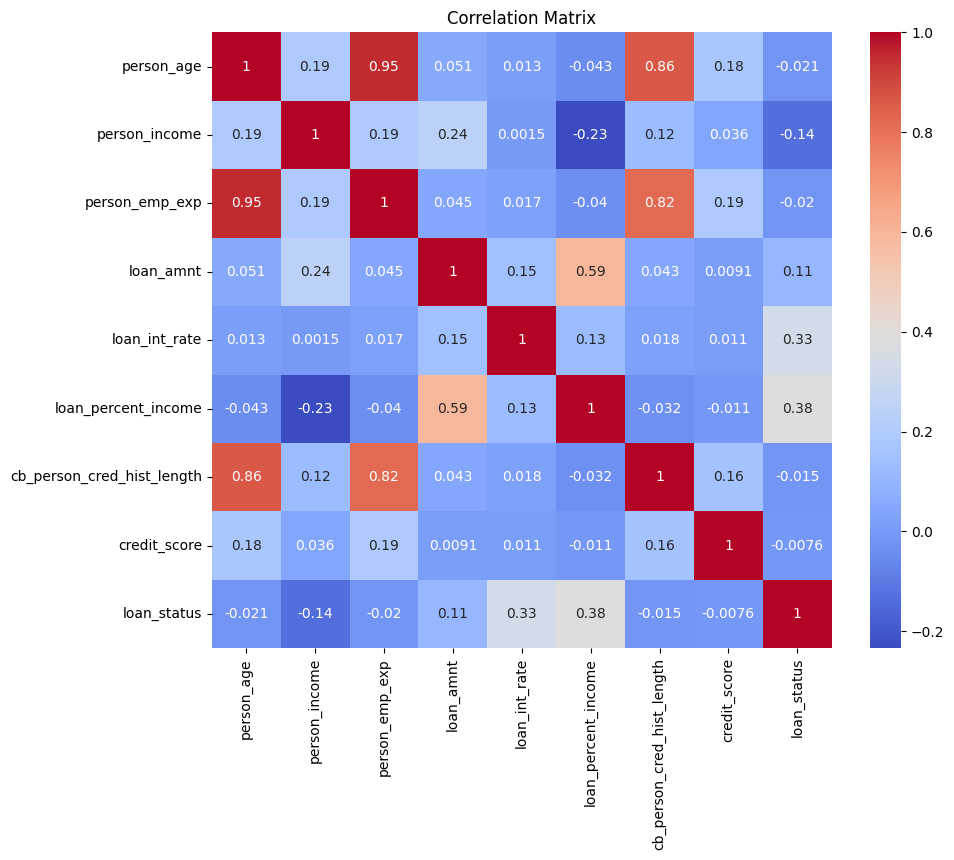

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Multivariate Analysis

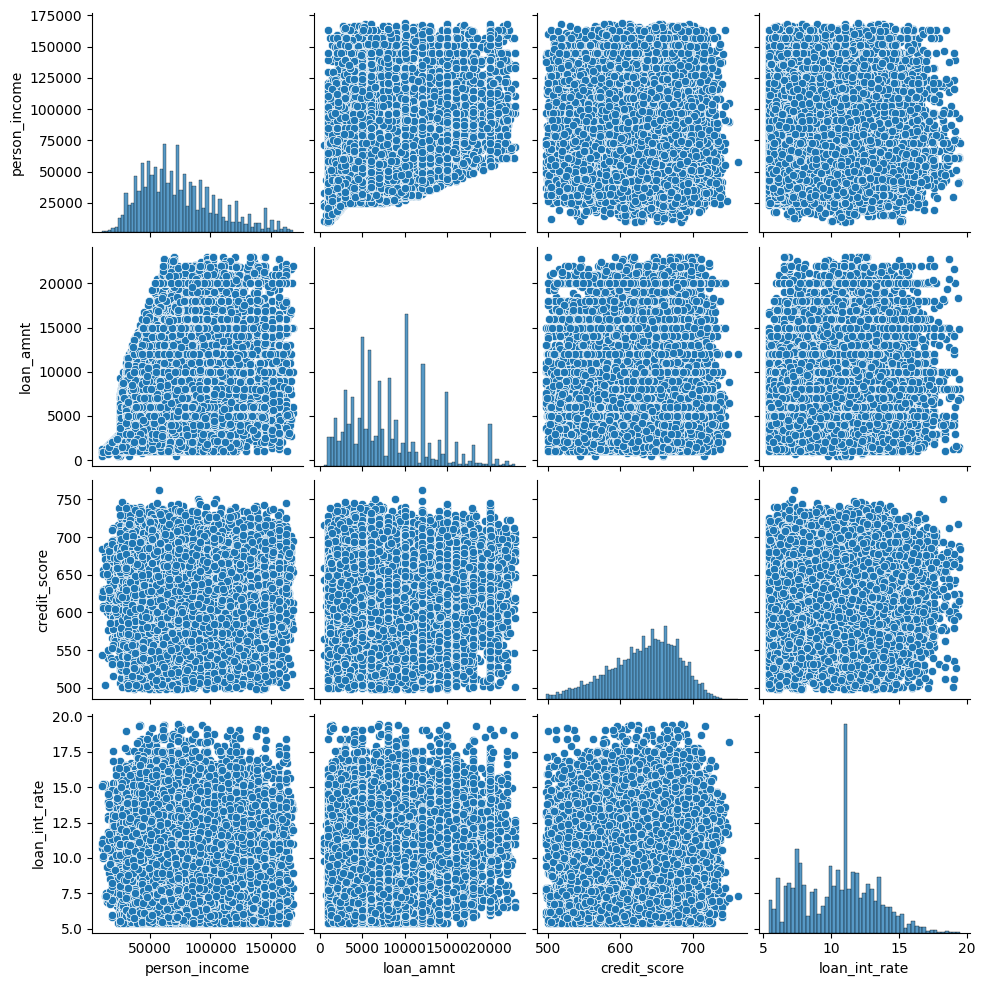

In [20]:
numeric_pairplot_cols = ['person_income', 'loan_amnt', 'credit_score', 'loan_int_rate']
existing_numeric_cols = [col for col in numeric_pairplot_cols if col in df.columns and pd.api.types.is_numeric_dtype(df[col])]

if existing_numeric_cols:
    sns.pairplot(df[existing_numeric_cols])
    plt.show()
else:
    print("No numeric columns found for pairplot.")

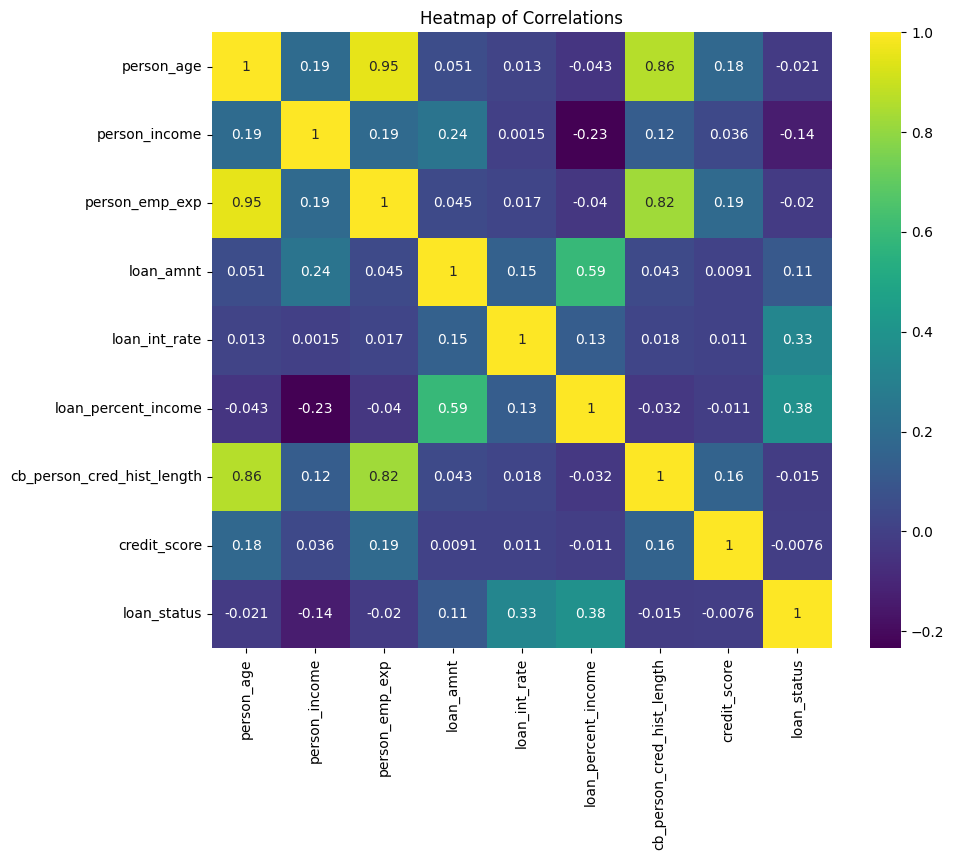

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='viridis')
plt.title('Heatmap of Correlations')
plt.show()